In [1]:
import numpy as np
import qiskit as qk

## Gate Functions
Running this import adds each of the gates to the QuantumCircuit class.
* QFT, iQFT
* PhiADDa (No control, Single control, double control)
* PhiADDaModN
* CMULTaModN
* Cua

In [2]:
import customGates

In [3]:
def init_reg(circ, q, val):
    """Initializes qubit register to value with NOT gates."""
    for i in range(len(q)):
        if val & (1<<i):
            circ.x(q[i])

### Create simple 4 bit adder circuit

In [4]:
b = qk.QuantumRegister(5, 'b')
res_b = qk.ClassicalRegister(5, 'res\_b')


circ = qk.QuantumCircuit(b, res_b)

# Add 20 + 10
a = 15
init_reg(circ, b, 10)

circ.qft(b, 5)
circ.PhiADDa(a, b, 5)
circ.iqft(b, 5)
circ.measure(b, res_b)

### Simulate the circuit

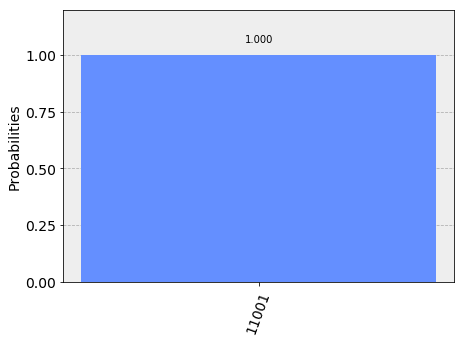

In [6]:
from qiskit.tools.visualization import plot_histogram
sim_backend = qk.BasicAer.get_backend('qasm_simulator')

job = qk.execute(circ, sim_backend)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

### Simulate the circuit with noise

In [7]:
qk.IBMQ.load_accounts()

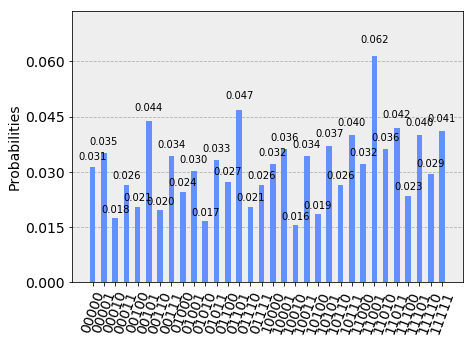

In [8]:
from qiskit.providers.aer import noise

device = qk.IBMQ.get_backend('ibmqx2')
properties = device.properties()
coupling_map = device.configuration().coupling_map

# Generate an Aer noise model for device
noise_model = noise.device.basic_device_noise_model(properties)
basis_gates = noise_model.basis_gates


# Perform noisy simulation
backend = qk.Aer.get_backend('qasm_simulator')
job = qk.execute(circ, backend,
                  coupling_map=coupling_map,
                  noise_model=noise_model,
                  basis_gates=basis_gates)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

### Run the circuit on the real device

In [ ]:
from qiskit.tools.monitor import job_monitor
device = qk.IBMQ.get_backend('ibmqx4')

job = qk.execute(circ, device)
job_monitor(job)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

Job Status: job is queued (60)      